# PERBANDINGAN BULAN ARAH ANGIN TERTINGGI
## Januari 2023

In [89]:
import pandas as dp
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#File Synoptik dan AWS
dft = dp.read_csv('C:/Users/Acer/Documents/Angintertinggi.csv')
df = dp.read_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [90]:
dft

,tgl,Jan
0,1,S
1,2,S
2,3,W
3,4,W
4,5,W
5,6,W
6,7,SW
7,8,W
8,9,W
9,10,W


In [91]:
df1

,Arah_Mata_Angin,tgl
0,W,1
1,W,2
2,W,3
3,W,4
4,W,5
5,W,6
6,W,7
7,W,8
8,W,9
9,W,10


In [92]:
#Mengolah Data AWS
df=df.drop(df.index[0])
#Filter data AWS berdasarkan tanggal
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
df['wd_avg'] = df['wd_avg'].astype(float)
filter=df.groupby(df.Tanggal.dt.date)['wd_avg'].max()
filter_sorted = filter.sort_index(ascending=True)
df1=dp.DataFrame(filter_sorted)
df1.reset_index(drop=False, inplace=True)
df1=df1.drop(columns=['Tanggal'])
if len(df1)==31:
  tgl=[]
  for i in range(32):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==30:
  tgl=[]
  for i in range(31):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==29:
  tgl=[]
  for i in range(30):
    tgl.append(i)
  tgl.remove(0)
else:
  tgl=[]
  for i in range(29):
    tgl.append(i)
  tgl.remove(0)
df1['tgl']=tgl

#Menambahkan arah mata angin
v=df1['wd_avg'].values.tolist()
l=[]
for i in v:
  if not math.isnan(i):
    if 22.5 <= i <= 67.5:
      l.append("NE")
    elif 67.5 <= i <= 112.5:
      l.append("E")
    elif 112.5<= i <= 157.5:
      l.append("SE")
    elif 157.5 <= i <=202.5:
      l.append("S")
    elif 202.5 <= i <=247.5:
      l.append("SW")
    elif 247.5 <= i <=292.5:
      l.append("W")
    elif 292.5 <= i <=337.5:
      l.append("NW")
    else :
      l.append("N")
  else :
    l.append(" ")

df1.insert(1,'Arah_Mata_Angin', l)
del df1['wd_avg']
df1.replace(' ', dp.NA, inplace=True)

#Mengolah Data Synoptik
dft = dft.drop(dft.index[-1])
dft.rename(columns={'Jan':'Arah_Mata_Angin'}, inplace=True)

In [93]:
dft

,tgl,Arah_Mata_Angin
0,1,S
1,2,S
2,3,W
3,4,W
4,5,W
5,6,W
6,7,SW
7,8,W
8,9,W
9,10,W


Indeks baris yang berisi NaN:
Index([], dtype='int64')
Chi-square statistic: 248.0
P-value: 0.4167421639480956
Degrees of freedom: 244
Tidak ada perbedaan yang signifikan antara kedua data.
Grafik Perbandingannya:


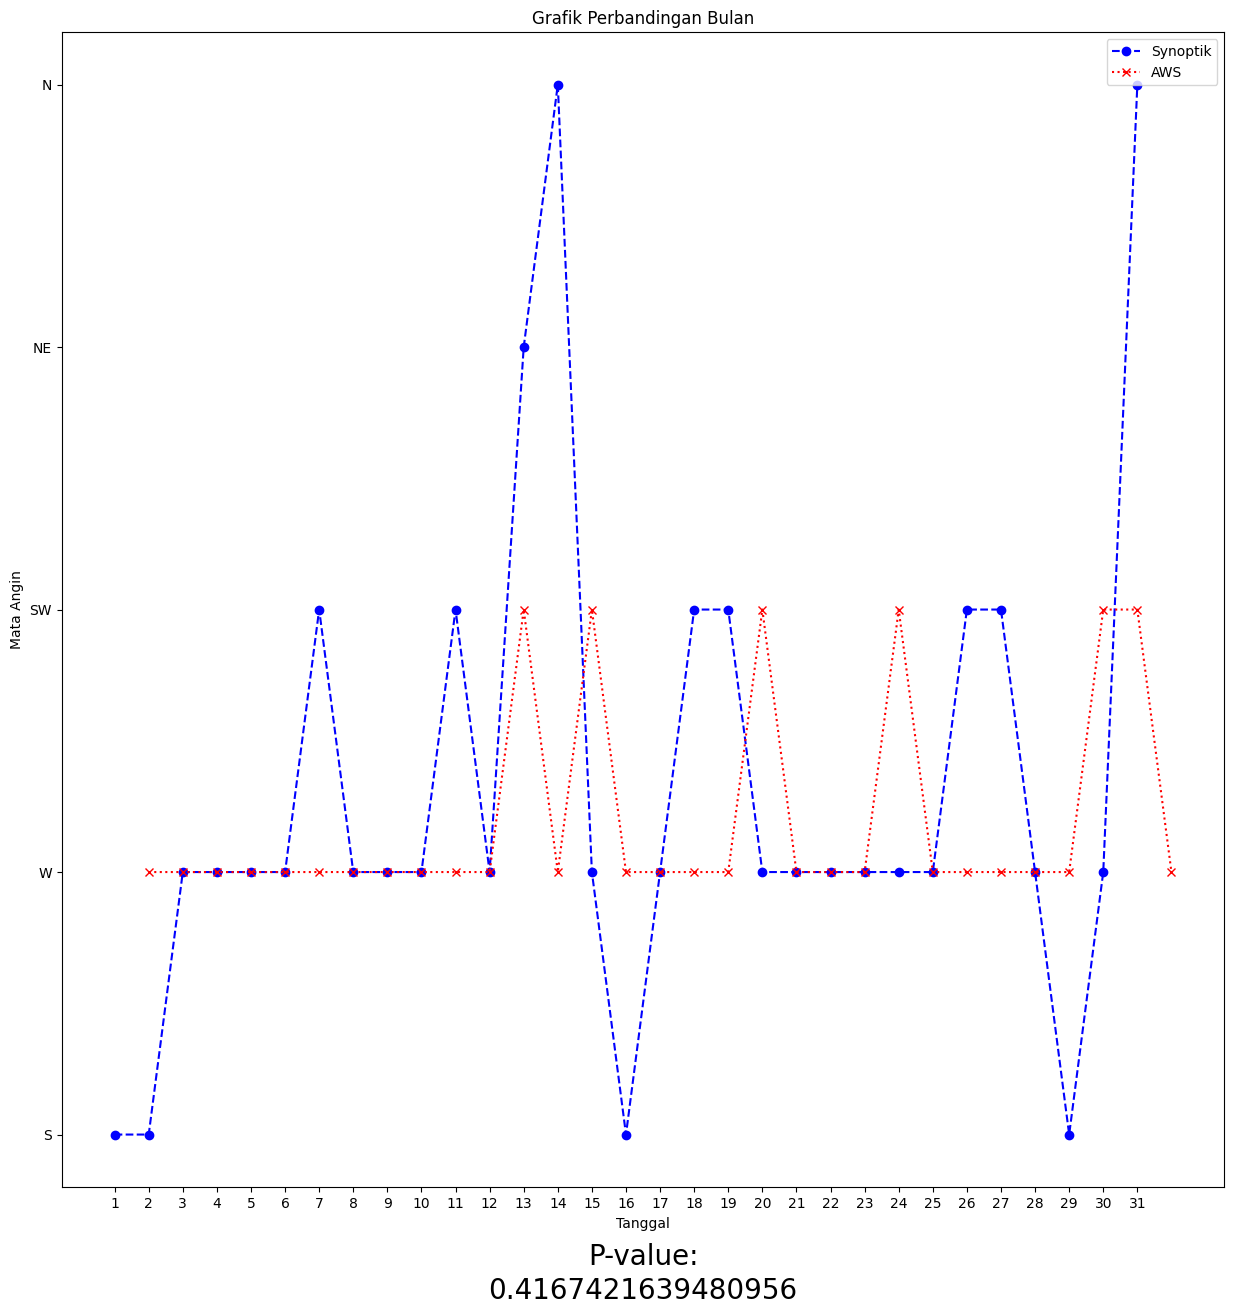

In [94]:
#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1['tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Hapus tanggal synoptik yang di AWS adalah NaN
dft=dft.dropna(axis=1)
filter_hapus4 = dft.isin(c4).any(axis=1)
df_cleaned14 = dft.drop(dft[filter_hapus4].index)

# Menggabungkan DataFrames
combined_data = dp.concat([df_cleaned14, df_cleaned_4])

# Membuat tabel kontingensi dari data yang digabungkan
contingency_table = dp.crosstab(combined_data['Arah_Mata_Angin'], combined_data['tgl'])

# Melakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
#print("Expected frequencies:\n", expected)

# Menentukan kesimpulan
alpha = 0.05  # Ambil tingkat signifikansi yang diinginkan
if p < alpha:
    conclusion = "Ada perbedaan yang signifikan antara kedua data."
else:
    conclusion = "Tidak ada perbedaan yang signifikan antara kedua data."

print(conclusion)
print("Grafik Perbandingannya:")
dft['Arah_Mata_Angin']=dft['Arah_Mata_Angin'].astype(str)
df1['Arah_Mata_Angin']=df1['Arah_Mata_Angin'].astype(str)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Bulan')
plt.plot(dft['tgl'], dft['Arah_Mata_Angin'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['tgl'], df1['Arah_Mata_Angin'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Mata Angin')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)

if p<alpha:
  plt.text(0.5, -0.09, p, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)

plt.show()

In [95]:
df1

,Arah_Mata_Angin,tgl
0,W,1
1,W,2
2,W,3
3,W,4
4,W,5
5,W,6
6,W,7
7,W,8
8,W,9
9,W,10
